# New Image Processing / Accumulation & Difference Features
Kesong Cao

In [68]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle
import skimage
data_dir = os.getcwd() # global var
# I used data from Dataset4 in Google Drive
data_dir = os.path.join(data_dir, "processed_Patients")

In [69]:
def read_patient(is_bleed, patient_id, pic_start, pic_end, output_info = False):
    patient_dir = os.path.join(data_dir, is_bleed, "Patient "+str(patient_id))
    #os.listdir(patient_dir)
    pics = []
    bbxs = []
    for i in range(pic_start, pic_end+1):
        img_filename = os.path.join(patient_dir, str(patient_id)+'_'+str(i)+'.jpg')
        csv_filename = os.path.join(patient_dir, str(patient_id)+'_'+str(i)+'.csv')
        #print(filename)
        try:
            pics.append(skimage.io.imread(img_filename))
            try:
                with open(csv_filename, newline='') as csvfile:
                    reader = csv.reader(csvfile)
                    reader.__next__() # ignore the headers
                    bbx_data = reader.__next__()
                    bbxs.append([int(bbx_data[5]), int(bbx_data[6]), int(bbx_data[11]), int(bbx_data[12])])
            except IOError:
                if (output_info):
                    print("    CSV FILE NOT FOUND: ", csv_filename[-10:])
                bbxs.append([])
        except IOError:
            if (output_info):
                print("IMG FILE NOT FOUND: ", img_filename[-10:])
    pics = np.asarray(pics)
    print(pics.shape)
    return pics, bbxs

In [70]:
def show_pic(pic, bbx = [], figs = (8, 8), img_name = ""):
    
    fig1, ax1 = plt.subplots(figsize = figs)
    # Rectangle takes bottom-left coords (bottom in terms of data coordinates, as the y axis is flipped, its top left visually)
    if(len(bbx) > 0):
        bottom_left = (bbx[0]-bbx[2]/2.0, bbx[1]-bbx[3]/2.0)
        ax1.add_patch(Rectangle(xy=bottom_left, width=bbx[2], height=bbx[3],linewidth=1,edgecolor='r',facecolor='none'))
    ax1.imshow(pic, cmap = "gray")
    ax1.set_title(img_name,fontsize=18)

In [89]:
pics, bbxs = read_patient("Bleed", 72, 1, 40)

(8, 1000, 1000)


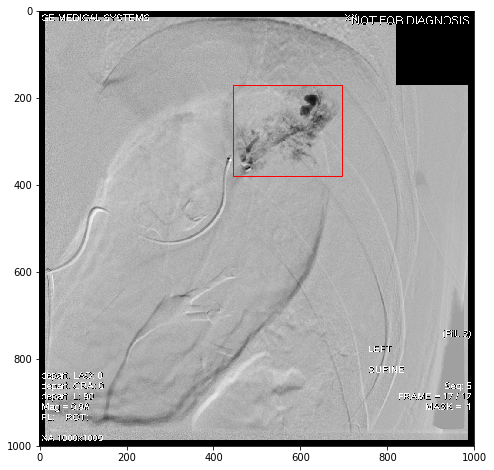

In [90]:
show_pic(pics[7], bbxs[7])

In [91]:
def time_weighted(pics, param=1):
    n = pics.shape[0]
    pic = np.zeros(pics[0].shape)
    for i in range(n):
        pic += pics[i] * (i*1.0*param/n)
    return pic
def k_difference(pics, k, param=1):
    n = pics.shape[0]
    pic = np.zeros(pics[0].shape)
    diffs = []
    for i in range(0,n-k):
        diffs.append((pics[i+k]-pics[i]) * (1.0*param))
        pic += diffs[i]
    return pic, np.asarray(diffs)

In [92]:
def process(diffs):
    n, h, w = diffs.shape
    pic = np.zeros(diffs[0].shape)
    for i in range(h):
        for j in range(w):
            param = 10
            for k in range(n):
                pic[i][j] += param*diffs[k][i][j]
            for k in range(n):
                if (diffs[k][i][j]<5):
                    pic[i][j] = 0

                
    return pic

In [93]:
# res = time_weighted(pics)
res, diffs = k_difference(pics, 1)
# show_pic(diffs[5],bbxs[15])
temp = process(diffs)

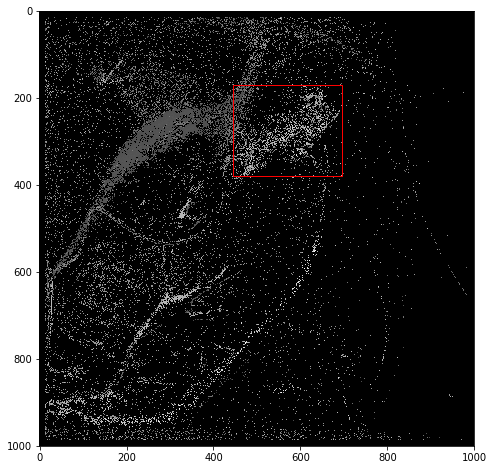

In [95]:
show_pic(temp, bbxs[7])